In [6]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv('data/telco-churn.csv')
print (df.shape)

(3333, 21)


In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
cnt = df["churn"].value_counts()
cnt

False    2850
True      483
Name: churn, dtype: int64

In [9]:
cnt_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (cnt_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

### Churn By Area Code

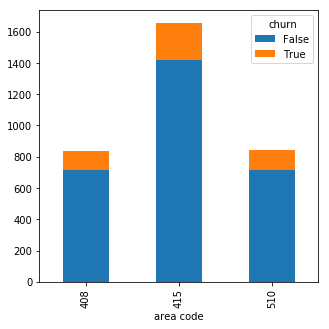

In [12]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Customers with International plan

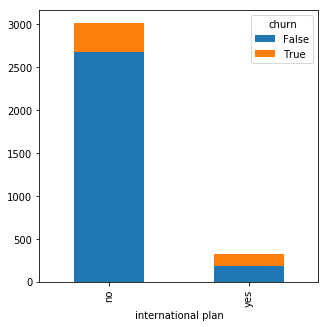

In [13]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Customers with Voice mail plan 

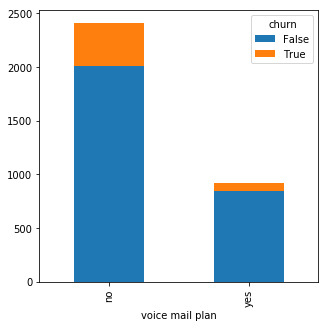

In [14]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Handle Categorical Cols - Label Encode

In [15]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [16]:
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object


### Tackling imbalanced classes

In [17]:
# Class count
count_class_0, count_class_1 = df.churn.value_counts()

# Divide by class
df_class_0 = df[df['churn'] == 0]
df_class_1 = df[df['churn'] == 1]

Random under-sampling:
1    483
0    483
Name: churn, dtype: int64


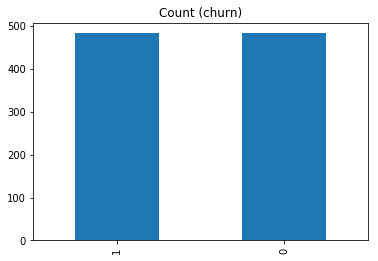

In [18]:
# Undersampling
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.churn.value_counts())

df_under.churn.value_counts().plot(kind='bar', title='Count (churn)');

Random over-sampling:
1    2850
0    2850
Name: churn, dtype: int64


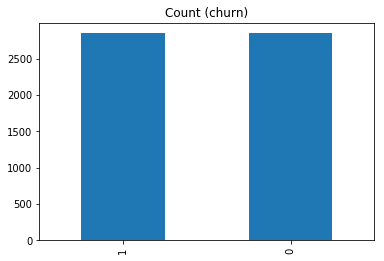

In [19]:
# Oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.churn.value_counts())

df_over.churn.value_counts().plot(kind='bar', title='Count (churn)');

In [20]:
df_over.shape

(5700, 21)

In [21]:
y = df_over['churn']

In [22]:
df_over.drop(["phone number","churn"], axis = 1, inplace=True)

In [23]:
X = df_over

In [24]:
# creating the train and validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,fbeta_score

In [26]:
# pass 1 : Logistic Regression
model1 = LogisticRegression()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("The accuracy score of Logistic Regression model is %s" %(accuracy_score(y_test,y_pred)))
print("The fbeta score of Logistic Regression model is %s" %(fbeta_score(y_test,y_pred,beta=0.5)))

The accuracy score of Logistic Regression model is 0.7666666666666667
The fbeta score of Logistic Regression model is 0.7554462403373156


In [30]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("The accuracy score of DecisionTreeClassifier model is %s" %(accuracy_score(y_test,y_pred)))
print("The fbeta score of DecisionTreeClassifier model is %s" %(fbeta_score(y_test,y_pred,beta=0.5)))

The accuracy score of DecisionTreeClassifier model is 0.9596491228070175
The fbeta score of DecisionTreeClassifier model is 0.9392767796224697


In [31]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test,y_pred)))
print("The fbeta score of RandomForestClassifier model is %s" %(fbeta_score(y_test,y_pred,beta=0.5)))

The accuracy score of RandomForestClassifier model is 0.9888888888888889
The fbeta score of RandomForestClassifier model is 0.9854101889500118


In [34]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [ ]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)

    # Create a random forest classifier object
    model = RandomForestClassifier()

    # Create a dictionary for the parameters 'max_depth',min_samples_split and min_samples_leaf
    params = {'max_depth':range(2,12,2),
              'min_samples_split':range(2,12,2),
              'min_samples_leaf':range(2,12,2)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(fbeta_score, beta=0.5)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
reg.score

# Produce the values for 'max_depth',min_samples_split and min_samples_leaf
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))

In [32]:
# applying best hyperparameter values to RandomForestClassfier
rf_clf = RandomForestClassifier(max_depth=10,min_samples_split=6,min_samples_leaf=2)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print("The accuracy score of hypertuned RandomForestClassifier model is %s" %(accuracy_score(y_test,y_pred)))
print("The fbeta score of hypertuned RandomForestClassifier model is %s" %(fbeta_score(y_test,y_pred,beta=0.5)))

The accuracy score of hypertuned RandomForestClassifier model is 0.9421052631578948
The fbeta score of hypertuned RandomForestClassifier model is 0.9493670886075949


In [35]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94       881
          1       0.96      0.92      0.94       829

avg / total       0.94      0.94      0.94      1710



In [36]:
print(confusion_matrix(y_test, y_pred))

[[846  35]
 [ 64 765]]


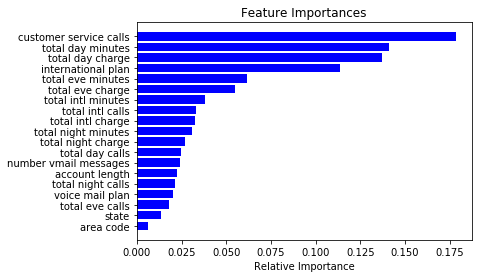

In [38]:
import matplotlib.pyplot as plt
# exhibiting feature importance
features = X.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()